## This Project belongs to IBM Data Analytics Pofessional Course

# House Sales in King County, USA

Instruction:

In this assignment, you are a Data Analyst working at a Real Estate Investment Trust. The Trust would like to start investing in Residential real estate. You are tasked with determining the market price of a house given a set of features. You will analyze and predict housing prices using attributes or features such as square footage, number of bedrooms, number of floors, and so on. 

About the Dataset

This dataset contains house sale prices for King County, which includes Seattle. It includes homes sold between May 2014 and May 2015. It was taken from [here](https://www.kaggle.com/harlfoxem/housesalesprediction?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-wwwcourseraorg-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDA0101ENSkillsNetwork20235326-2022-01-01). It was also slightly modified for the purposes of this course. The modified dataset is depositted at the following url:


In [ ]:
url='https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/FinalModule_Coursera/data/kc_house_data_NaN.csv'

| Variable      | Description                                                                                                 |
| ------------- | ----------------------------------------------------------------------------------------------------------- |
| id            | A notation for a house                                                                                      |
| date          | Date house was sold                                                                                         |
| price         | Price is prediction target                                                                                  |
| bedrooms      | Number of bedrooms                                                                                          |
| bathrooms     | Number of bathrooms                                                                                         |
| sqft_living   | Square footage of the home                                                                                  |
| sqft_lot      | Square footage of the lot                                                                                   |
| floors        | Total floors (levels) in house                                                                              |
| waterfront    | House which has a view to a waterfront                                                                      |
| view          | Has been viewed                                                                                             |
| condition     | How good the condition is overall                                                                           |
| grade         | overall grade given to the housing unit, based on King County grading system                                |
| sqft_above    | Square footage of house apart from basement                                                                 |
| sqft_basement | Square footage of the basement                                                                              |
| yr_built      | Built Year                                                                                                  |
| yr_renovated  | Year when house was renovated                                                                               |
| zipcode       | Zip code                                                                                                    |
| lat           | Latitude coordinate                                                                                         |
| long          | Longitude coordinate                                                                                        |
| sqft_living15 | Living room area in 2015(implies-- some renovations) This might or might not have affected the lotsize area |
| sqft_lot15    | LotSize area in 2015(implies-- some renovations)                                                            |


**Task:**

1) Display the data types of each column, and show the statistical summary of the dataframe
2) Drop the columns "id" and "Unnamed: 0", then obtain a statistical summary of the data
3) Findg the number of missing values in 'bedrooms' and  'bathrooms' columns, and replace the missing values with their relevant averages
4) Count the number of houses with unique floor values
5) Determine whether houses with a waterfront view or without a waterfront view have more price outliers
6) Show the regression plot of sqft_above versus price
7) Find R-squared value of the simple linear model of 'price', using the feature 'longitude'
8) Fit a linear regression model to predict the 'price' using the feature 'sqft_living' then calculate the R^2
9) Fit a linear regression model to predict the 'price' using the list of features as shown below and then calculate the R^2
10) Create a list of tuples, the first element in the tuple contains the name of the estimator: 'scale', 'polynomial', 'model'. The second element in the tuple contains the model constructor StandardScaler(), PolynomialFeatures(include_bias=False) and LinearRegression()
11) Use the list to create a pipeline object to predict the 'price', fit the object using the features in the list features, and calculate the R^2
12) Import modules for cross_val_score, train_test_split and Ridge
13) Split the data into train-test sets with 15% allocated to test data and print the number of testing and training samples
14) Create and fit a Ridge regression object using the training data, set the regularization parameter to 0.1, and calculate the R^2 using the test data
15) Perform a second order polynomial transform on both the training data and testing data. Create and fit a Ridge regression object using the training data, set the regularisation parameter to 0.1, and calculate the R^2 utilising the test data provided


**Importing the required packages**

In [1]:
#!pip install -U scikit-learn

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
%matplotlib inline

Loading the csv data:


In [7]:
df = pd.read_csv(url)
df.head(2)

,Unnamed: 0,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0,7129300520,20141013T000000,221900.0,3.0,1.00,1180,5650,1.0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,1,6414100192,20141209T000000,538000.0,3.0,2.25,2570,7242,2.0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639


1) Display the data types of each column, and show the statistical summary of the dataframe


In [8]:
df.dtypes

Unnamed: 0         int64
id                 int64
date              object
price            float64
bedrooms         float64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [9]:
df.describe()

,Unnamed: 0,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,21613.00000,2.161300e+04,2.161300e+04,21600.000000,21603.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,...,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,10806.00000,4.580302e+09,5.400881e+05,3.372870,2.115736,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,...,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,6239.28002,2.876566e+09,3.671272e+05,0.926657,0.768996,918.440897,4.142051e+04,0.539989,0.086517,0.766318,...,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,0.00000,1.000102e+06,7.500000e+04,1.000000,0.500000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,...,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,5403.00000,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,...,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,10806.00000,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,...,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,16209.00000,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,...,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,21612.00000,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,...,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


2) Dropping the columns <code>"id"</code>  and <code>"Unnamed: 0"</code> and obtaining a statistical summary of the data


In [10]:
df.drop(['id', 'Unnamed: 0'], axis=1, inplace=True)
df.head(2)

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,20141013T000000,221900.0,3.0,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,20141209T000000,538000.0,3.0,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639


3. finding the number of missing values in 'bedrooms' and  'bathrooms' columns, and replacing the missing values with their relevant average.


In [11]:

print("number of NaN values for the column bedrooms :", df['bedrooms'].isnull().sum())
print("number of NaN values for the column bathrooms :", df['bathrooms'].isnull().sum())


number of NaN values for the column bedrooms : 13
number of NaN values for the column bathrooms : 10


In [12]:
# replace the missing values as suggested above:
mean=df['bedrooms'].mean()
df['bedrooms'].replace(np.nan,mean, inplace=True)

In [15]:
mean=df['bathrooms'].mean()
df['bathrooms'].replace(np.nan,mean, inplace=True)

In [14]:
print("number of NaN values for the column bedrooms :", df['bedrooms'].isnull().sum())
print("number of NaN values for the column bathrooms :", df['bathrooms'].isnull().sum())

number of NaN values for the column bedrooms : 0
number of NaN values for the column bathrooms : 0


4. count the number of houses with unique floor values

In [16]:

df['floors'].to_frame().value_counts()

floors
1.0       10680
2.0        8241
1.5        1910
3.0         613
2.5         161
3.5           8
Name: count, dtype: int64

5. determine whether houses with a waterfront view or without a waterfront view have more price outliers


<Axes: xlabel='waterfront', ylabel='price'>

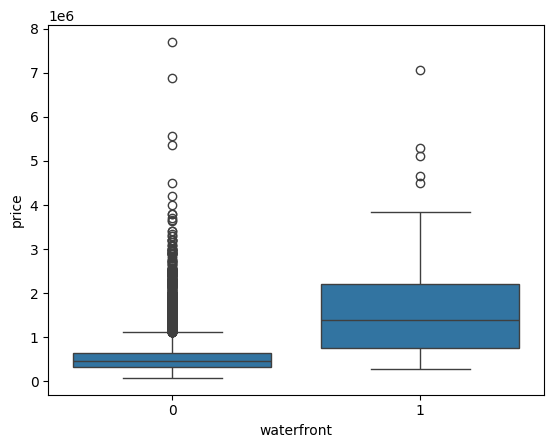

In [17]:
sns.boxplot(x='waterfront', y='price', data=df)

6. Show the regression plot of sqft_above versus price


Text(0.5, 1.0, 'Reggression plot of price vs sqft_above')

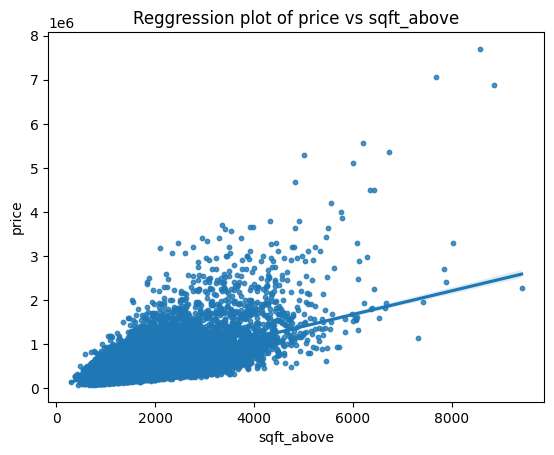

In [20]:
sns.regplot(x='sqft_above', y='price', data=df, scatter_kws={'s':10})
plt.title('Reggression plot of price vs sqft_above')

7. Find R-squared value of the simple linear model of 'price', using the feature 'longitude'

In [23]:
X = df[['long']]
Y = df['price']
lm = LinearRegression()
lm.fit(X,Y)
print('R^2 = ', lm.score(X, Y))

R^2 =  0.00046769430149007363


8. Fit a linear regression model to predict the 'price' using the feature 'sqft_living' then calculate the R^2


In [ ]:
x=df[['sqft_living']]
y=df['price']
lm=LinearRegression()
lm.fit(x,y)
y_hat=lm.predict(x)
print('R^2 = ', lm.score(x, y))

9. Fit a linear regression model to predict the 'price' using the list of features as shown below and then calculate the R^2

In [ ]:
features =["floors", "waterfront","lat" ,"bedrooms" ,"sqft_basement" ,"view" ,"bathrooms","sqft_living15","sqft_above","grade","sqft_living"]     

In [ ]:
z=df[features]
y=df['price']
lm=LinearRegression()
lm.fit(z,y)
y_hat=lm.predict(z)

10. Create a list of tuples, the first element in the tuple contains the name of the estimator: 'scale', 'polynomial', 'model'. The second element in the tuple contains the model constructor StandardScaler(), PolynomialFeatures(include_bias=False) and LinearRegression()

In [ ]:
Input=[('scale',StandardScaler()),('polynomial', PolynomialFeatures(include_bias=False)),('model',LinearRegression())]

11. Use the list to create a pipeline object to predict the 'price', fit the object using the features in the list features, and calculate the R^2

In [ ]:
z=z.astype(float)
pipe=Pipeline(Input)
pipe.fit(z,y)
y_hat=pipe.predict(z)
r_squared = r2_score(y,y_hat)
print(f'R^2 = {r_squared}')

12. Import modules for cross_val_score, train_test_split and Ridge

In [25]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge

13. Split the data into train-test sets with 15% allocated to test data and print the number of testing and training samples

In [26]:
features =["floors", "waterfront","lat" ,"bedrooms" ,"sqft_basement" ,"view" ,"bathrooms","sqft_living15","sqft_above","grade","sqft_living"]    
X = df[features]
Y = df['price']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.15, random_state=1)

print("number of test samples:", x_test.shape[0])
print("number of training samples:",x_train.shape[0])

number of test samples: 3242
number of training samples: 18371


14. Create and fit a Ridge regression object using the training data, set the regularization parameter to 0.1, and calculate the R^2 using the test data.

In [ ]:
RidgeModel=Ridge(alpha=0.1)
RidgeModel.fit(x_train, y_train)
yhat_test = RidgeModel.predict(x_test)
print(f'R^2 = {r2_score(yhat_test, y_test)}')

15. Perform a second order polynomial transform on both the training data and testing data. Create and fit a Ridge regression object using the training data, set the regularisation parameter to 0.1, and calculate the R^2 utilising the test data provided


In [27]:
pr= PolynomialFeatures (degree = 2)
x_train_pr = pr.fit_transform(x_train)
x_test_pr = pr.fit_transform(x_test)

RidgeModel=Ridge(alpha=0.1)
RidgeModel.fit(x_train_pr, y_train)
yhat_test = RidgeModel.predict(x_test_pr)
print(f'R^2 = {r2_score(yhat_test, y_test)}')

R^2 = 0.6216730925633285
